In [1]:
import pandas as pd
import os

In [2]:
method = 'aicso2'
categories = 'o2o'
horizon = 1
train_days = 60
val_days = 5
model_name = 'sac_base'
env_name = 'hedge031'
code = 'IM'
direction = 'long'
index = 46

In [3]:
dirs = os.path.join(
    './record', 'agent', method, 'g_instruments', 'rolling', 'normal_factors3',
    str(train_days), str(val_days), "{0}_{1}".format(categories, str(horizon)),
    str(index), "{0}_{1}_{2}_{3}".format(model_name, env_name, code,
                                         str(direction)))

In [4]:
res = []
for file in os.listdir(dirs):
    filename = os.path.join(dirs, file)
    ext = filename.split('.')
    #print(ext)
    if ext[-1] != 'feather':
        continue
    print(filename)
    dt = pd.read_feather(filename)
    dt = dt.set_index('trade_time')
    name = filename.split('/')[-1].split('.')[0]
    res.append({'dt':dt,'name':name})

./record/agent/aicso2/g_instruments/rolling/normal_factors3/60/5/o2o_1/46/sac_base_hedge031_IM_long/46_model2000_profit.feather
./record/agent/aicso2/g_instruments/rolling/normal_factors3/60/5/o2o_1/46/sac_base_hedge031_IM_long/46_model5000_profit.feather
./record/agent/aicso2/g_instruments/rolling/normal_factors3/60/5/o2o_1/46/sac_base_hedge031_IM_long/46_model10000_profit.feather
./record/agent/aicso2/g_instruments/rolling/normal_factors3/60/5/o2o_1/46/sac_base_hedge031_IM_long/46_model16000_profit.feather
./record/agent/aicso2/g_instruments/rolling/normal_factors3/60/5/o2o_1/46/sac_base_hedge031_IM_long/46_model12000_profit.feather
./record/agent/aicso2/g_instruments/rolling/normal_factors3/60/5/o2o_1/46/sac_base_hedge031_IM_long/46_model7000_profit.feather
./record/agent/aicso2/g_instruments/rolling/normal_factors3/60/5/o2o_1/46/sac_base_hedge031_IM_long/46_best_model_profit.feather
./record/agent/aicso2/g_instruments/rolling/normal_factors3/60/5/o2o_1/46/sac_base_hedge031_IM_long/

In [5]:
res1 = []
for dm in res:
    ds = dm['dt']
    name = dm['name']
    ds = ds.reset_index()
    ds['trade_date'] = pd.to_datetime(ds['trade_time']).dt.strftime('%Y-%m-%d')
    m1 = ds.groupby('trade_date')['profit'].sum().reset_index()
    m1 = m1.set_index('trade_date')
    m1.columns = [name.split('_')[1]]
    res1.append(m1)
    

In [6]:
m1#.columns = ['dd']

,model11000
trade_date,
2024-12-30,0.001084
2024-12-31,0.000400
2025-01-02,-0.017249
2025-01-03,0.005617
2025-01-06,0.005030
2025-01-07,0.015354


<Axes: xlabel='trade_date'>

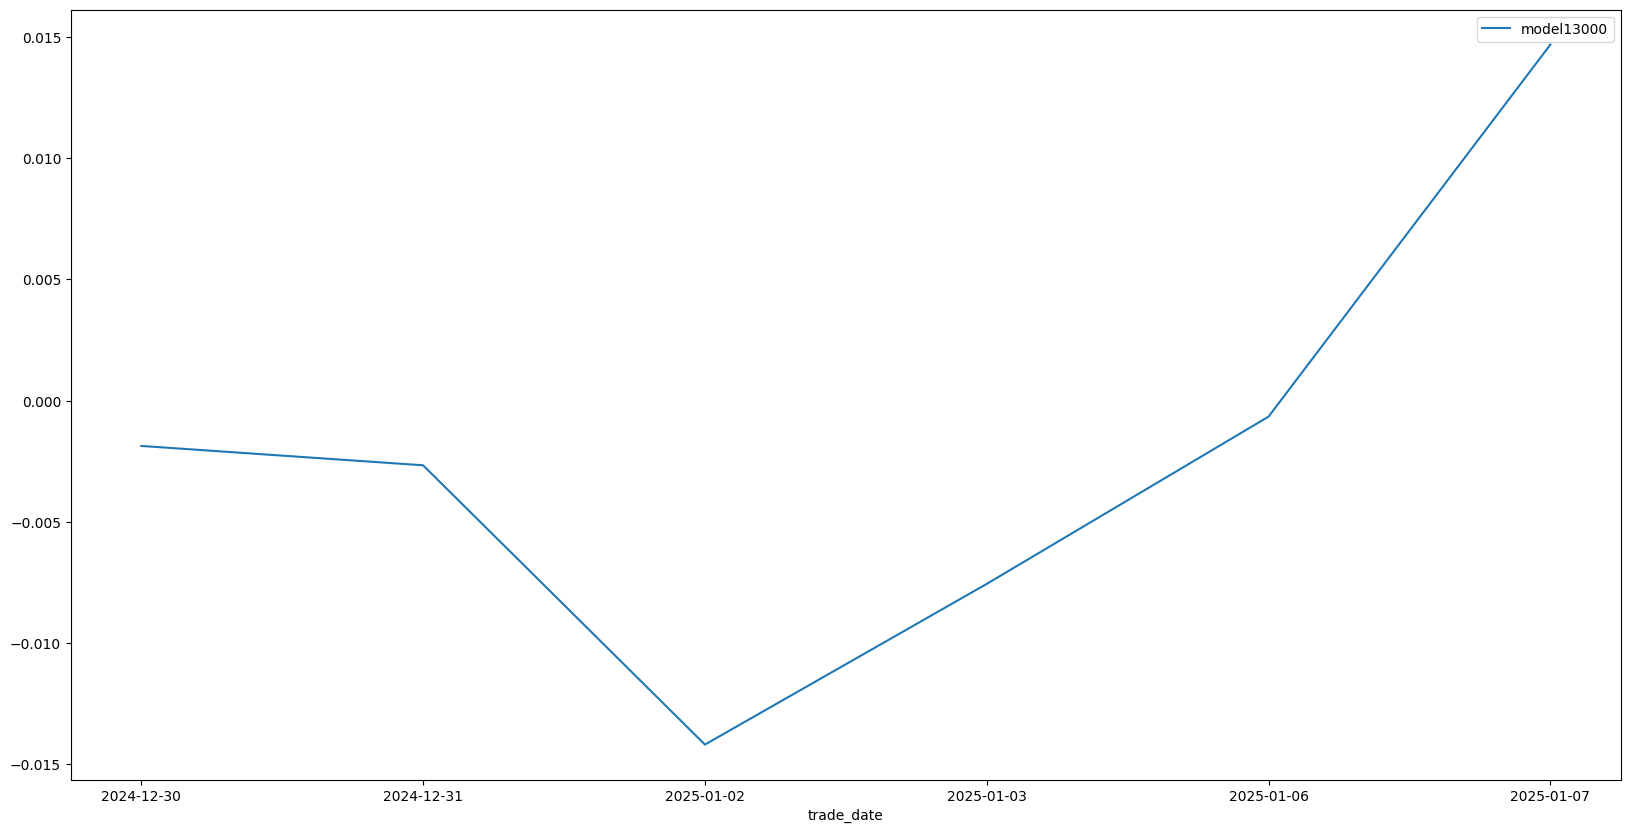

In [9]:
pd.concat(res1, axis=1)[['model13000']].cumsum().plot(figsize=(20,10))